# Consolidated Revenue Forecasting Analysis and AI-Driven Forecast for Nike, Inc.

## Executive Summary

- The proof of concept executed predicts a robust growth trajectory for Nike, Inc., forecasting an increase from 12.83 billion in Q1 to 13.28 billion by Q4 of 2024.
- Generative AI, specifically GPT-4, was used to interpret and structure data from Investor Relations reports, enriching the forecasting model with nuanced financial insights.
- Sentiment analysis is leveraged as a qualitative dimension, positively correlating with market and investor sentiments, and is incorporated as exogenous variables in the AI models.
- Revenue forecasts can be utilized for strategic planning and proactive supply chain adjustments, aligning logistics and operational strategies with predicted growth patterns.

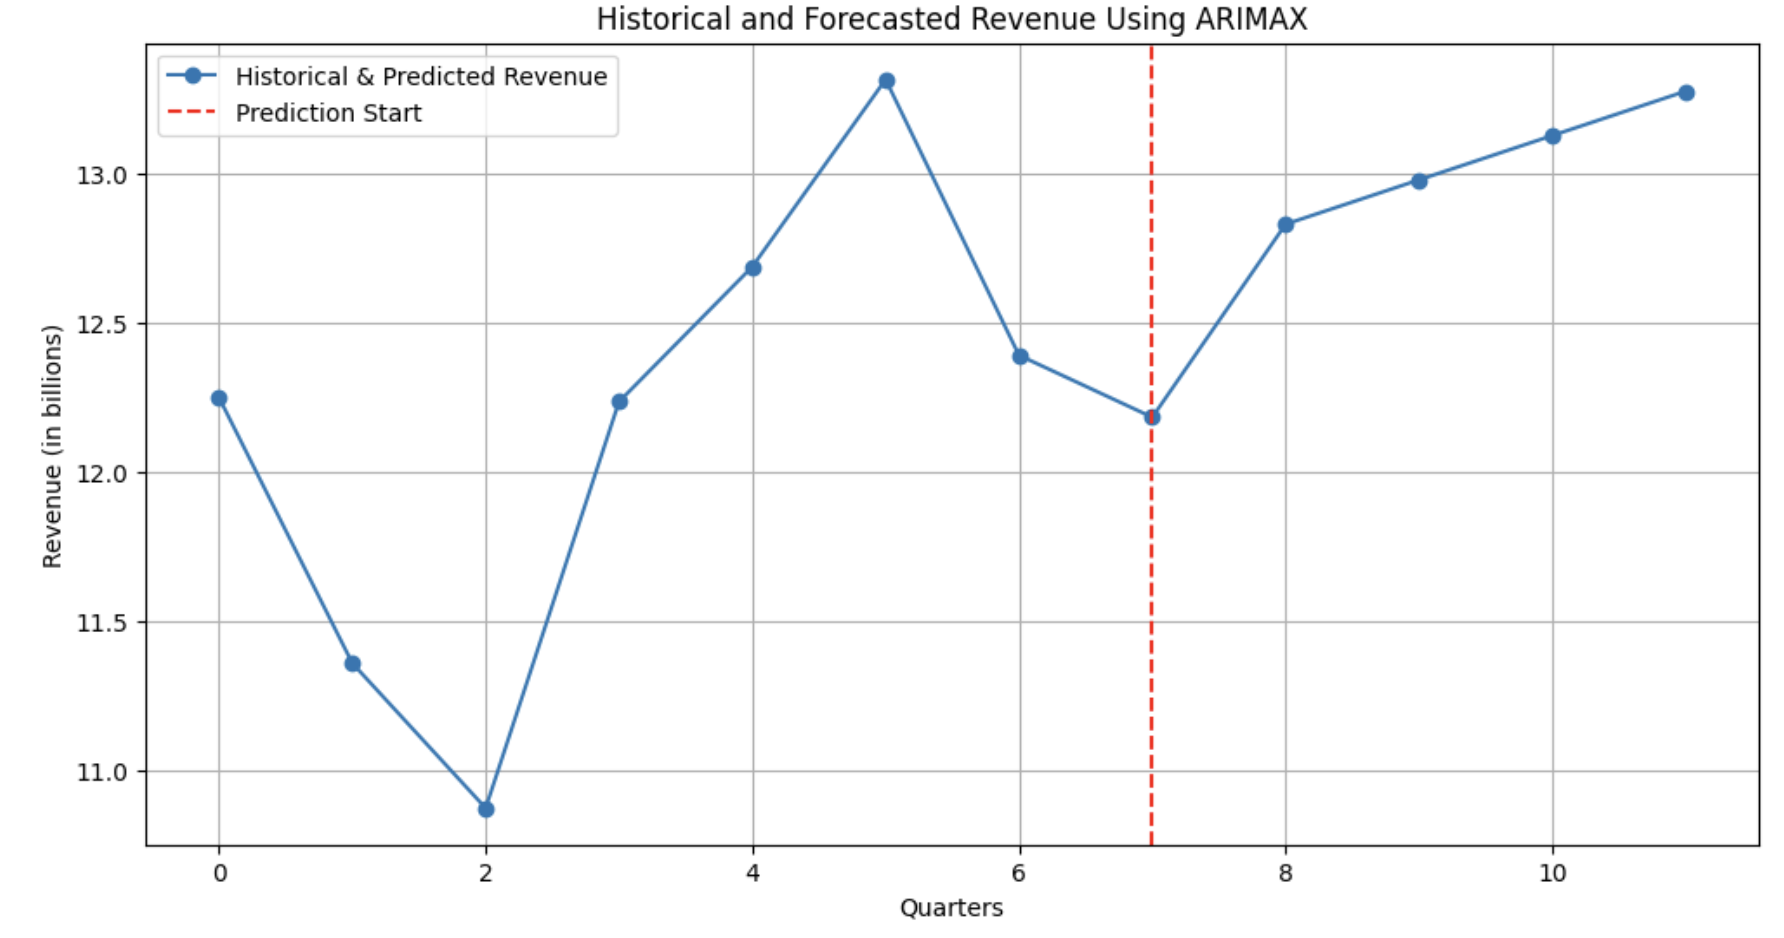

## Project Objectives

- To provide a combined analytical view using historical financial data, sentiment analysis, and Generative AI to forecast Nike, Inc.'s revenues for the next four quarters.
- To predict Nike's financial trajectory and equip stakeholders with insights for informed decision-making and strategic planning.

## Data Overview and Methodology

### Data Composition

- Utilized financial metrics from Nike's past 8 quarters and sentiment scores from IR reports.
- Processed data includes revenues, cost of sales, gross profit, operating expenses, net income, and market sentiment.

### Methodological Approach

#### Data Processing

- Acquisition of public IR reports from Nike's website, parsing to JPEG and fed into LLM
- Use of linear regression for non-revenue variables to capture trends of important variables for ARIMAX model input.
- Generation of JPGs from IR PDF reports and subsequent extraction of data using GPT-4, converted to CSV format for analysis.

#### Predictive Modeling

- Linear regression models to ascertain linear trends and ARIMAX for revenue forecasting incorporating sentiment scores and financial metrics.
- GPT-4 used for extracting and analyzing financial information from IR reports, enriching the forecast model.
- Evaluation of various ARIMA configurations (from ARIMA(1, 0, 0) to ARIMA(2, 1, 0)) to find the optimal parameter set for revenue prediction.

## Synthesized Findings

- Forecast indicates sequential revenue growth, with an optimistic financial outlook for 2024, balanced with a caution due to potential model convergence issues.
- Sentiment analysis and GPT-4 extraction techniques add depth to quantitative forecasts, capturing investor sentiments and qualitative market trends.
- Forecasts are actionable but should be integrated with broader market analysis and adjusted as new data emerges.

## Implications for Supply Chain and Strategic Decision-Making

- Consistent growth predictions imply the need for strategic capacity planning and resource allocation for logistics partners.
- Positive forecasts suggest scaling up production and distribution, prompting supply chain stakeholders to optimize operations for anticipated demand increases.

## Further Actions and Recommendations

- Expand historical data points to refine model training and forecasting accuracy.
- Automate the data extraction and transformation process for efficiency in handling new reports.
- Integrate a wider range of exogenous variables, including market trends and economic indicators.
- Employ model validation techniques such as cross-validation to gauge model robustness and predictive reliability.

## Acknowledging Data and Forecasting Limitations

- The small dataset may limit the detection of long-term trends and susceptibility to model overfitting.
- External factors and sentiment analysis constraints may impact forecast accuracy.
- Model assumptions require careful consideration, and forecasts should be used as indicative insights rather than definitive projections.

## Conclusion

The combined analysis through traditional time series forecasting and Generative AI showcases a promising revenue trajectory for Nike, Inc., encouraging strategic preparation in anticipation of growth. However, the incorporation of comprehensive market analysis and continuous model refinement is recommended to ensure the reliability and actionability of these forecasts.

In [3]:
# Re-import the pandas library and load the data again
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the original data
file_path = './datasets/financial_data (1).csv'
nike_data_original = pd.read_csv(file_path)

# Select only the numeric columns, excluding 'Quarter'
nike_data_numeric = nike_data_original.select_dtypes(include=['float64', 'int64'])

# Initialize a dictionary to store the linear regression models for each feature
linear_models = {}
forecasted_features = pd.DataFrame()

# Forecast the next 4 quarters for each numeric feature using linear regression
for feature in nike_data_numeric.columns:
    if feature != 'Revenues':  # We don't forecast Revenues here, it's our target for ARIMAX
        X = np.array(range(len(nike_data_numeric))).reshape(-1, 1)  # Time variable as regressor
        y = nike_data_numeric[feature].values
        linear_models[feature] = LinearRegression().fit(X, y)
        # Predict the next 4 quarters and store the forecasts
        forecasted_features[feature] = linear_models[feature].predict(np.array(range(len(y), len(y) + 4)).reshape(-1, 1))

# Show the forecasted features
forecasted_features

,Cost of Sales,Gross Profit,Operating Overhead Expense,Total Selling and Administrative Expense,Net Income,Effective Tax Rate,Inventories,Cash and Equivalents,Dividends Declared per Common Share,Sentiment_about_results,Sentiment_about_future
0,7.565679,5.585321,3.343679,4.356036,1.0385,0.194157,8.037571,5.683179,0.353929,0.555357,0.628571
1,7.742607,5.610643,3.437524,4.457905,0.9605,0.205256,8.099476,5.088857,0.362857,0.514881,0.607143
2,7.919536,5.635964,3.531369,4.559774,0.8825,0.216355,8.161381,4.494536,0.371786,0.474405,0.585714
3,8.096464,5.661286,3.625214,4.661643,0.8045,0.227454,8.223286,3.900214,0.380714,0.433929,0.564286


In [5]:
!pip install statsmodels --quiet

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


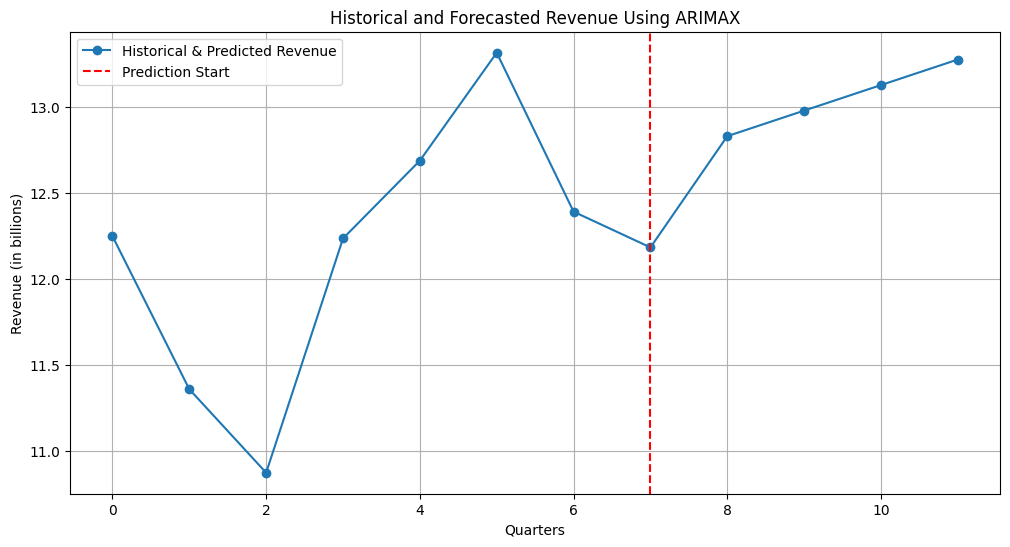

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Prepare the endogenous and exogenous variables for ARIMAX model
endog = nike_data_original['Revenues']
exog = nike_data_numeric.drop('Revenues', axis=1)

# Fit the ARIMAX model (order=(1, 0, 0) is a simple AR(1) model)
# We will not use a seasonal order since the data is very limited
arimax_model = SARIMAX(endog, exog=exog, order=(1, 0, 0), enforce_stationarity=False, enforce_invertibility=False)
arimax_results = arimax_model.fit(disp=False)

# Forecast the next 4 quarters using the forecasted exogenous variables
forecast = arimax_results.get_forecast(steps=4, exog=forecasted_features)

# Get the forecasted mean values
forecasted_revenue = forecast.predicted_mean

# Combine the historical and forecasted revenues for plotting
historical_plus_forecasted_revenue = pd.concat([endog, forecasted_revenue])

# Plot the historical and forecasted revenues
plt.figure(figsize=(12, 6))
plt.plot(historical_plus_forecasted_revenue.index, historical_plus_forecasted_revenue, marker='o', label='Historical & Predicted Revenue')
plt.axvline(x=endog.index[-1], color='r', linestyle='--', label='Prediction Start')
plt.xlabel('Quarters')
plt.ylabel('Revenue (in billions)')
plt.title('Historical and Forecasted Revenue Using ARIMAX')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
forecasted_revenue

8     12.829493
9     12.978160
10    13.126826
11    13.275493
Name: predicted_mean, dtype: float64

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


8     12.829493
9     12.978160
10    13.126826
11    13.275493
Name: predicted_mean, dtype: float64
8     12.829495
9     12.978162
10    13.126829
11    13.275496
Name: predicted_mean, dtype: float64
8     12.829496
9     12.978163
10    13.126829
11    13.275496
Name: predicted_mean, dtype: float64
8     12.829500
9     12.978167
10    13.126833
11    13.275500
Name: predicted_mean, dtype: float64
8     12.829493
9     12.978160
10    13.126827
11    13.275494
Name: predicted_mean, dtype: float64


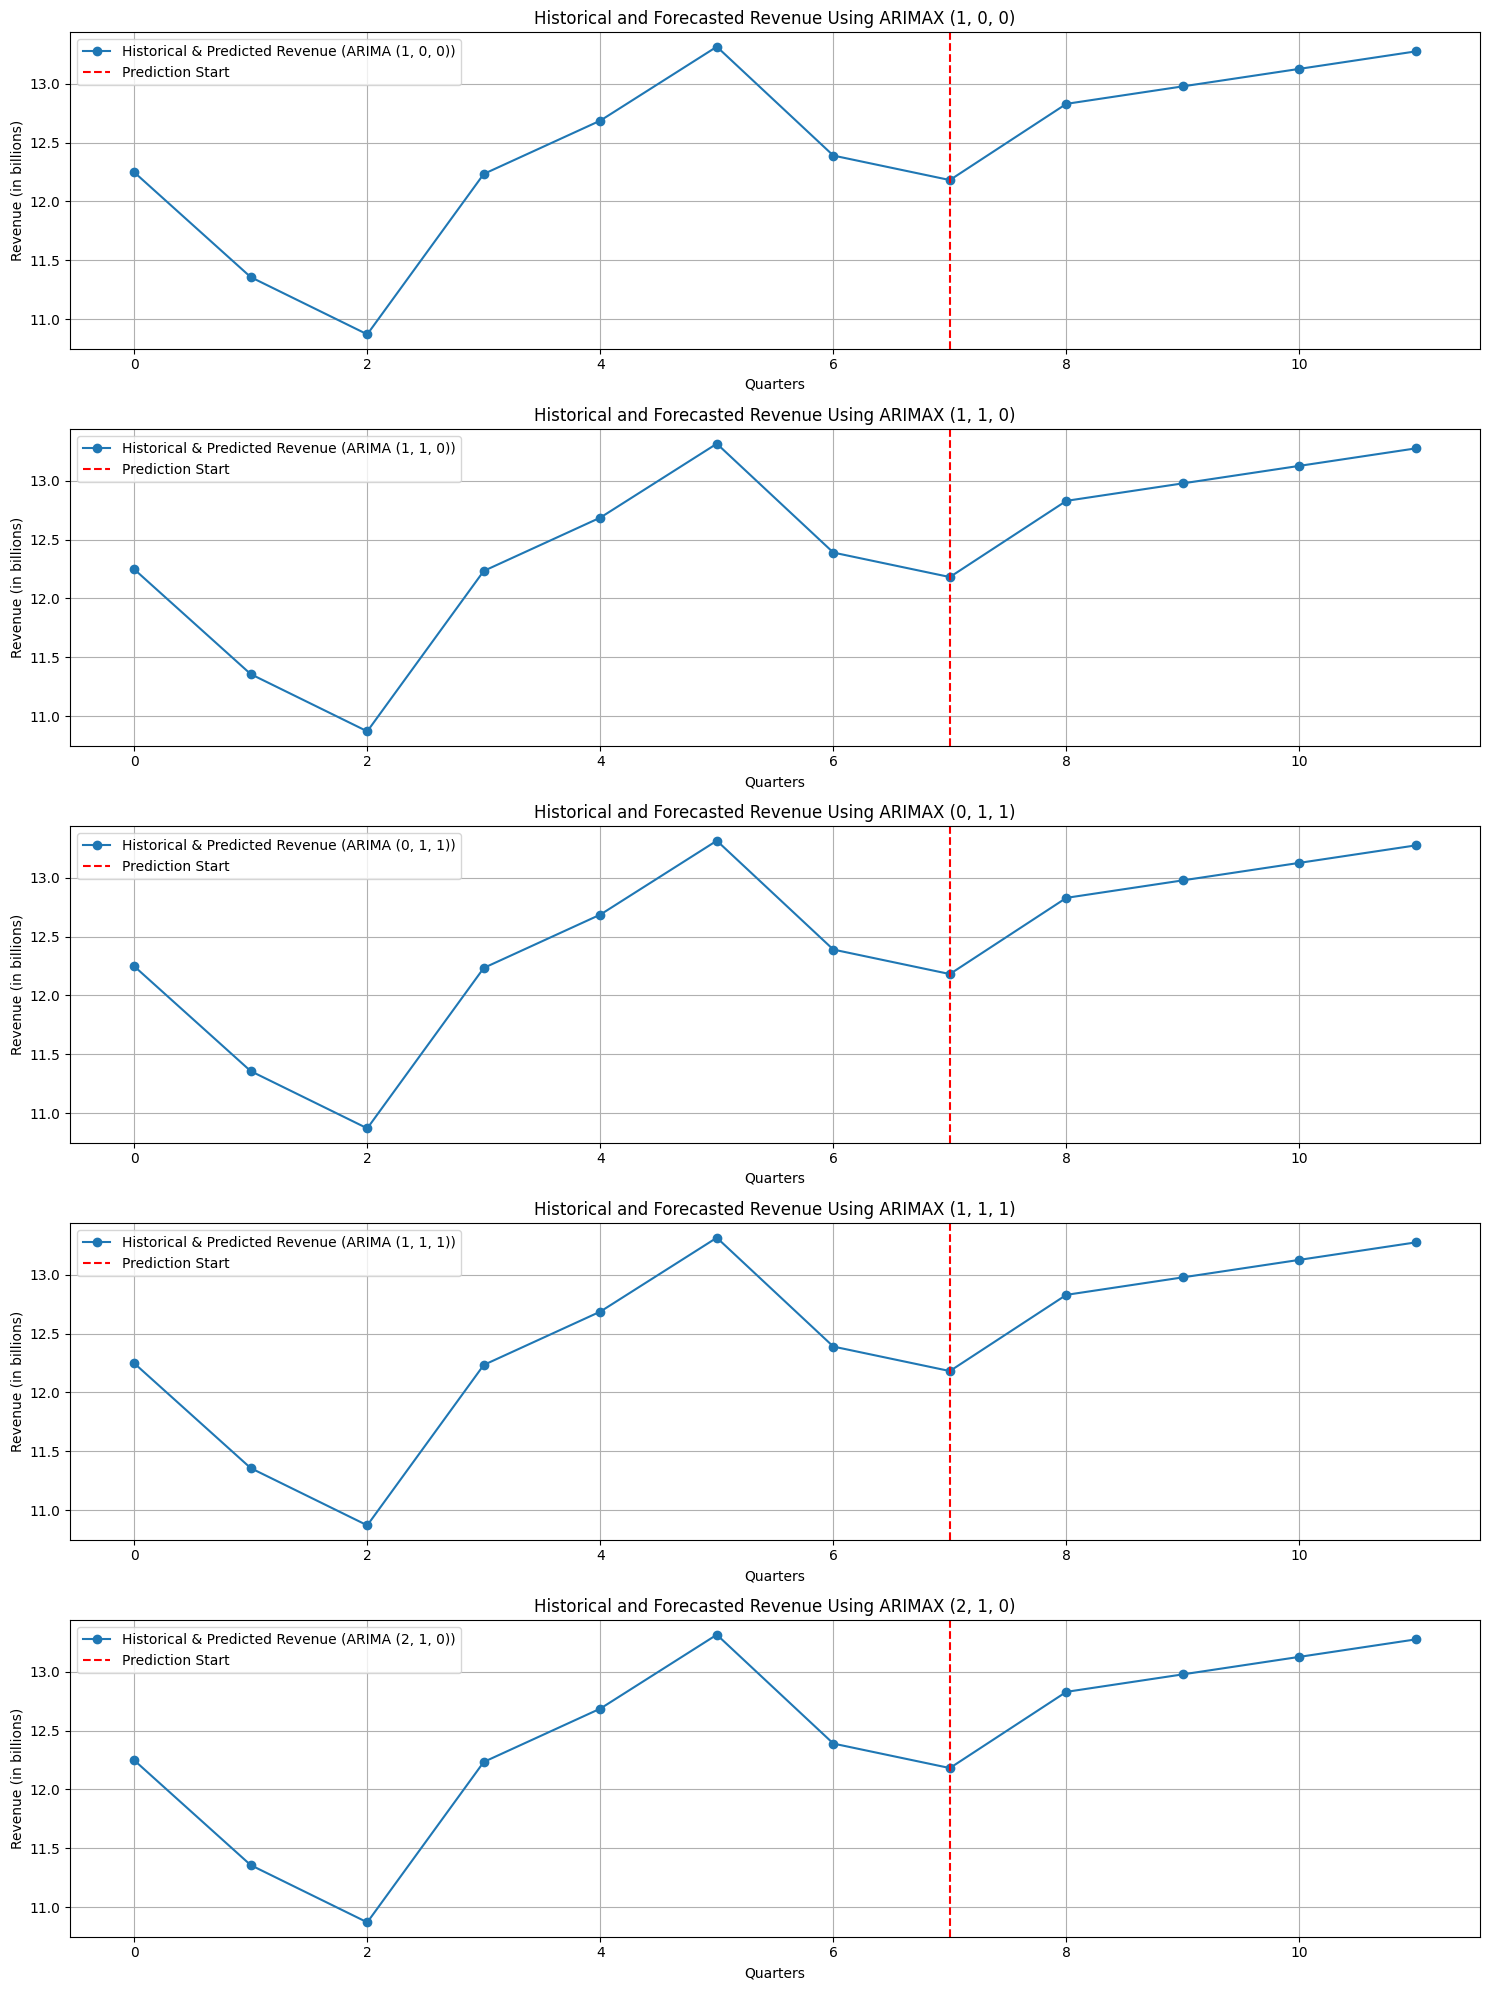

In [18]:
# Define different sets of ARIMA orders to try
arima_orders = [
    (1, 0, 0),
    (1, 1, 0),
    (0, 1, 1),
    (1, 1, 1),
    (2, 1, 0)
]

# Plot for each of the ARIMA orders
plt.figure(figsize=(15, 20))

for i, order in enumerate(arima_orders, 1):
    # Fit the ARIMAX model with the current order
    arimax_model = SARIMAX(endog, exog=exog, order=order, enforce_stationarity=False, enforce_invertibility=False)
    arimax_results = arimax_model.fit(disp=False)

    # Forecast the next 4 quarters using the forecasted exogenous variables
    forecast = arimax_results.get_forecast(steps=4, exog=forecasted_features)
    forecasted_revenue = forecast.predicted_mean
    print(forecasted_revenue)

    # Combine the historical and forecasted revenues for plotting
    historical_plus_forecasted_revenue = pd.concat([endog, forecasted_revenue])

    # Subplot for each model
    plt.subplot(5, 1, i)
    plt.plot(historical_plus_forecasted_revenue.index, historical_plus_forecasted_revenue, marker='o', label=f'Historical & Predicted Revenue (ARIMA {order})')
    plt.axvline(x=endog.index[-1], color='r', linestyle='--', label='Prediction Start')
    plt.xlabel('Quarters')
    plt.ylabel('Revenue (in billions)')
    plt.title(f'Historical and Forecasted Revenue Using ARIMAX {order}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()